In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# [Problem 1] Feature selection for practice

In [2]:
df = pd.read_csv('train.csv')

data = df.loc[:, ['GrLivArea', 'YearBuilt', 'SalePrice']]
data

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


# [Problem 2] Estimation and evaluation by linear regression

Data analyze

In [3]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values

,Total,Percent
SalePrice,0,0.0
YearBuilt,0,0.0
GrLivArea,0,0.0


No missing values found in these 2 features.

In [4]:
def plot(data, title):
    fig, axs = plt.subplots(ncols=3, figsize=(16,7))
    
    # histogram
    s = sns.histplot(ax = axs[0], data=data)
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    # boxplot
    s = sns.boxplot(ax = axs[1], data=data)
    # violin plot
    s = sns.violinplot(ax = axs[2], data=data)
    fig.suptitle(title)
    plt.show()

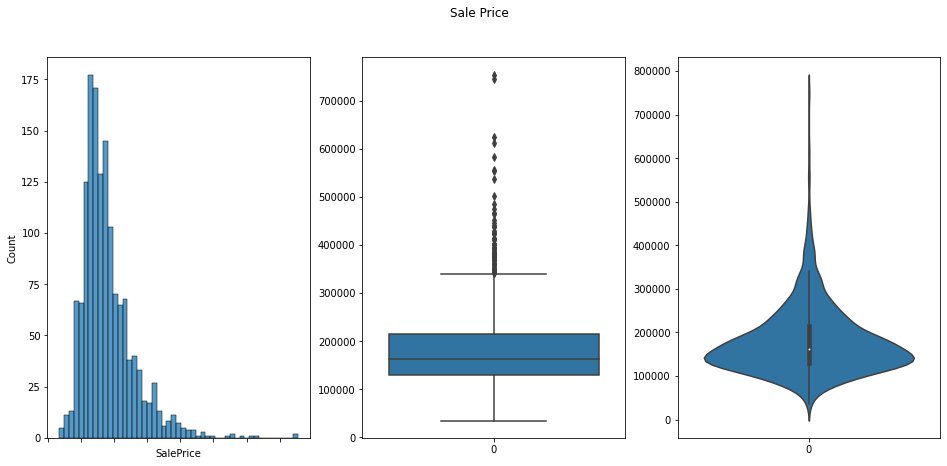

In [5]:
plot(data['SalePrice'], 'Sale Price')

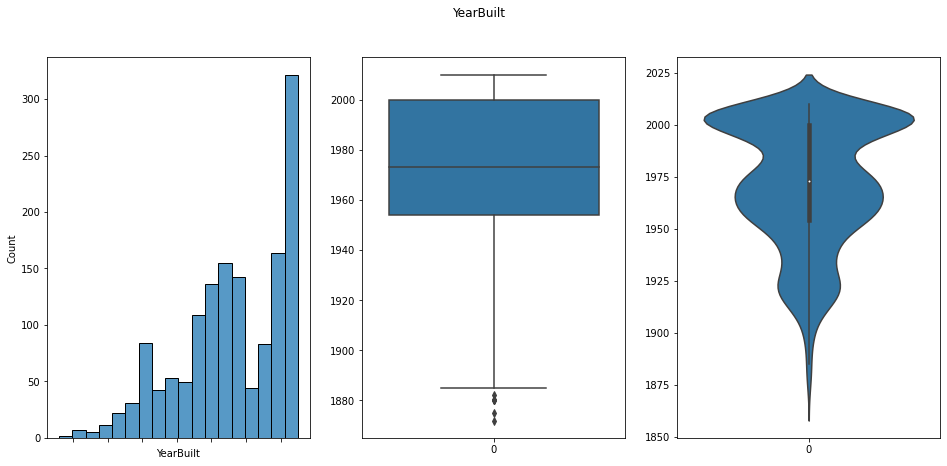

In [6]:
plot(data['YearBuilt'], 'YearBuilt')

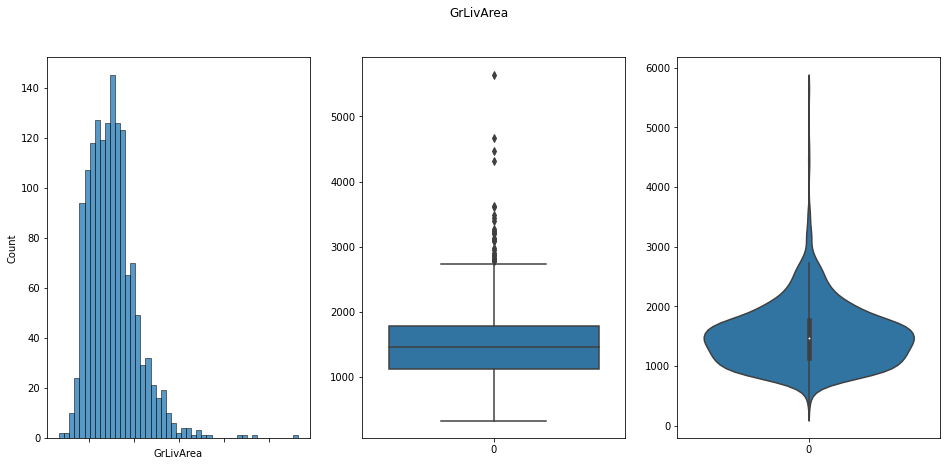

In [7]:
plot(data['GrLivArea'], 'GrLivArea')

Data pre-processing

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_data = data.iloc[:, :-1].to_numpy()
train_label = data['SalePrice'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label)

scaler = StandardScaler().fit(x_train)
x_train= scaler.transform(x_train)

In [9]:
x_test = scaler.transform(x_test)

Linear Regression

In [10]:
from sklearn.metrics import mean_squared_error
    
sns.set_theme(style="darkgrid")

def learn_model(model, cols=['GrLivArea', 'Yearbuild']):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Mean squared error: {}'.format(mean_squared_error(y_test, y_pred)))

    labels = ['actual', 'predicted']

    m1 = np.hstack((x_test, y_test[:, None], np.zeros((len(x_test), 1))))
    m2 = np.hstack((x_test, y_pred[:, None], np.ones((len(x_test), 1))))
    m = pd.DataFrame(np.vstack((m1, m2)), columns= cols + ['SalePrice', 'type'])

    for c in cols:
        s = sns.lmplot(x=c, y='SalePrice', data=m,  hue='type', legend_out=False, markers=['o', 'x'])
        leg = s.axes.flat[0].get_legend()
        for t, l in zip(leg.texts, labels): t.set_text(l)

Mean squared error: 1551936322.2950075


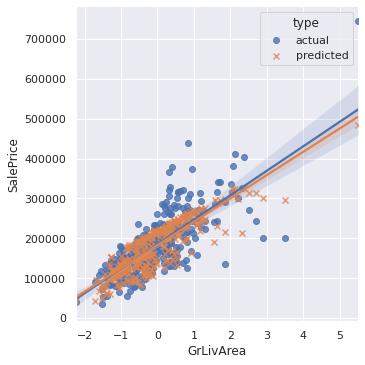

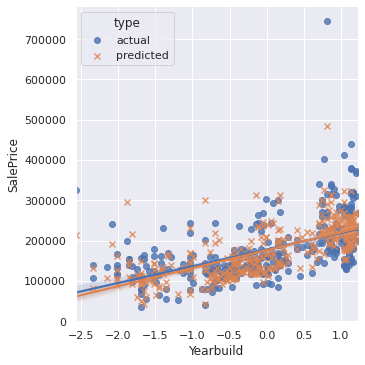

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()  
learn_model(reg)

# [Problem 3] Comparison of methods

SVR

Mean squared error: 5624226468.347588


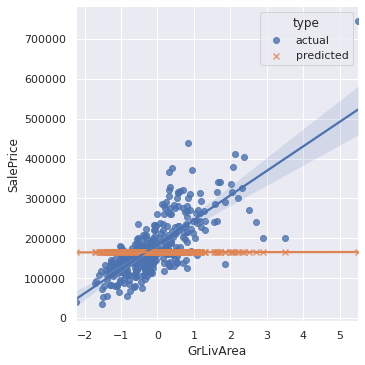

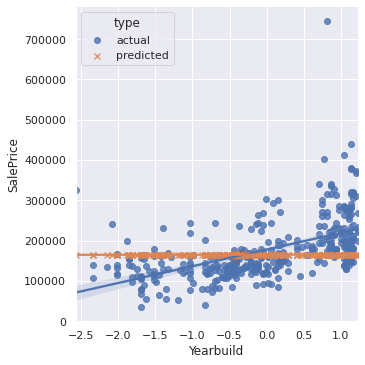

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
learn_model(reg)

Decision tree

Mean squared error: 2254024542.9562407


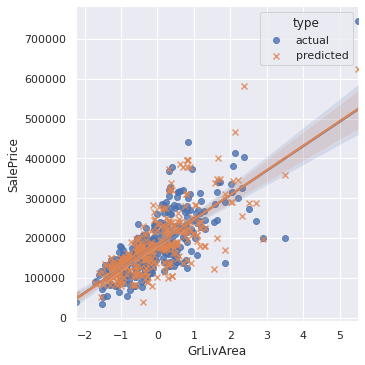

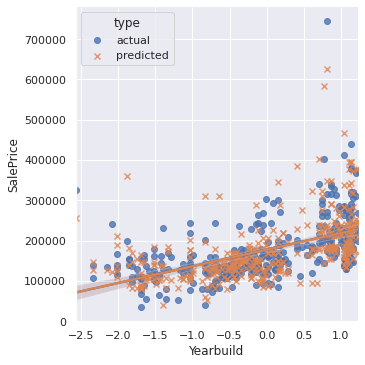

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(random_state=0)
learn_model(reg)

Random forest

Mean squared error: 2257360140.3650117


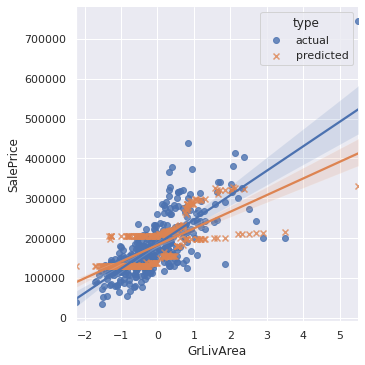

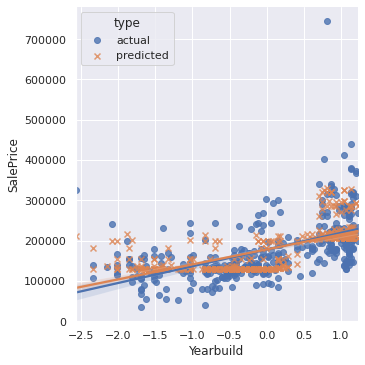

In [14]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(max_depth=2, random_state=0)
learn_model(reg)

# [Problem 4] (Advance assignment) Learning using other features

In [15]:
data = df[['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd', 'SalePrice']]

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values

,Total,Percent
SalePrice,0,0.0
YearRemodAdd,0,0.0
OverallQual,0,0.0
YearBuilt,0,0.0
GrLivArea,0,0.0


In [16]:
train_data = data.iloc[:, :-1].to_numpy()
train_label = data['SalePrice'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label)

scaler = StandardScaler().fit(x_train)
x_train= scaler.transform(x_train)
x_test = scaler.transform(x_test)

Mean squared error: 1728592415.042453


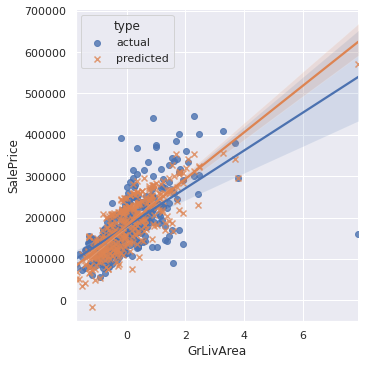

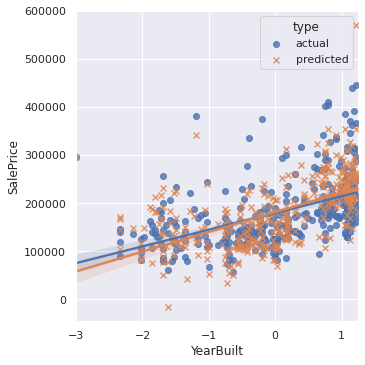

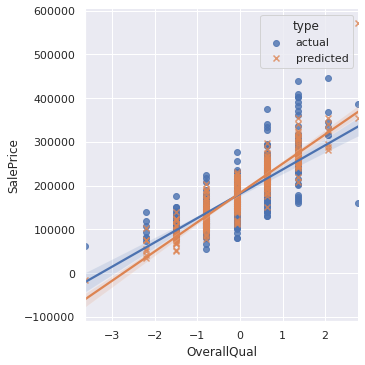

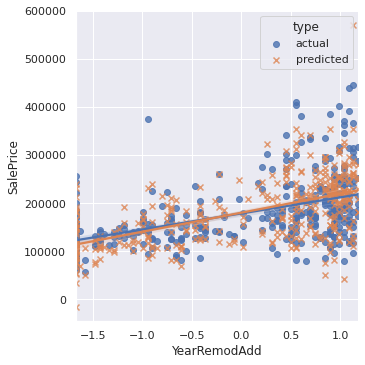

In [17]:
reg = LinearRegression()  
learn_model(reg, cols=['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd'])

Mean squared error: 5160927962.696332


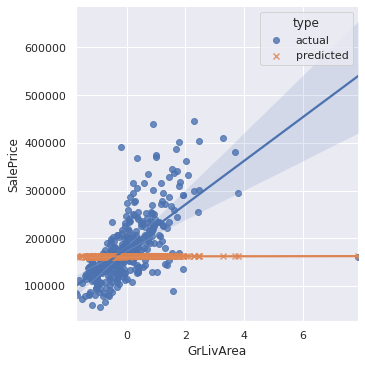

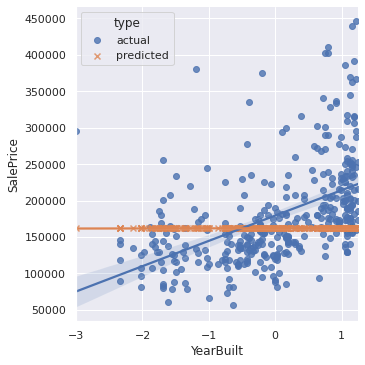

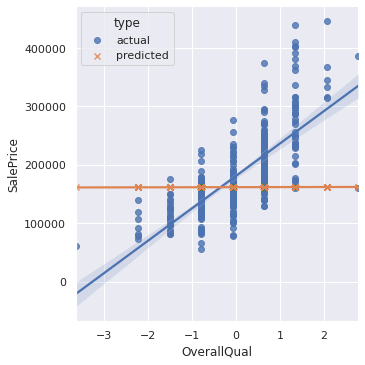

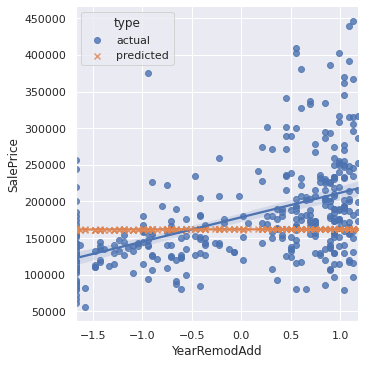

In [18]:
reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
learn_model(reg, cols=['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd'])

Mean squared error: 1913044594.783355


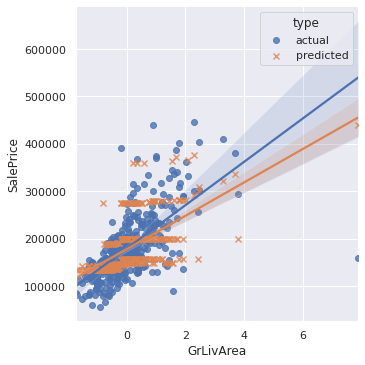

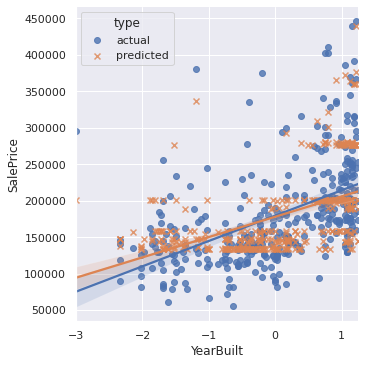

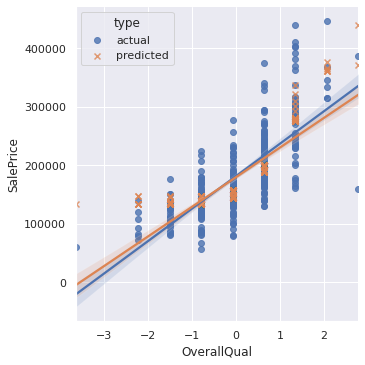

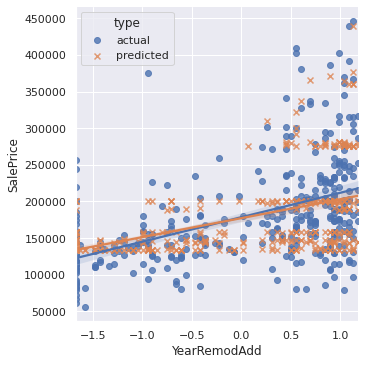

In [19]:
reg = RandomForestRegressor(max_depth=2, random_state=0)
learn_model(reg, cols=['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd'])

Mean squared error: 2003716769.1643836


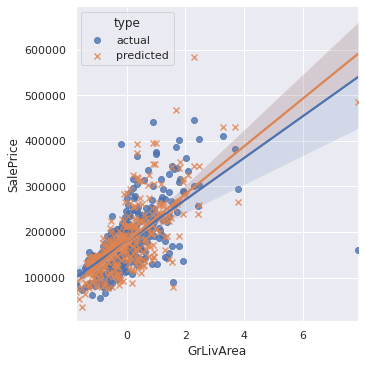

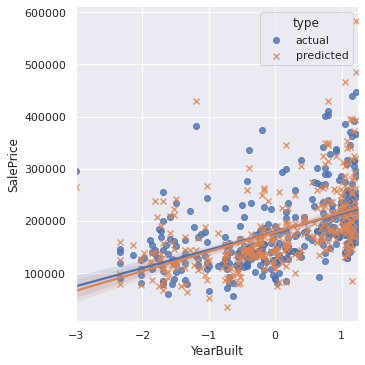

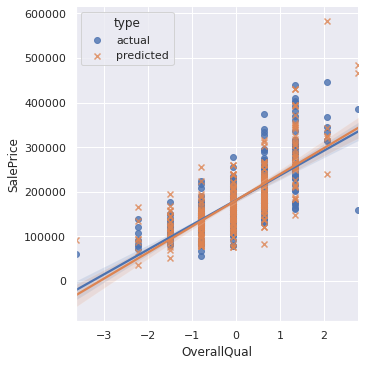

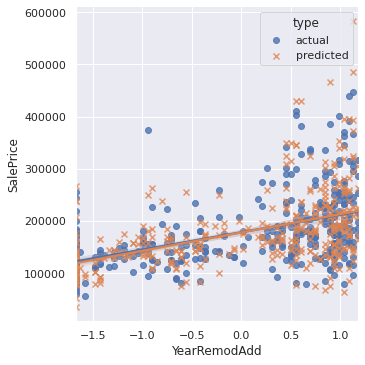

In [20]:
reg = DecisionTreeRegressor(random_state=0)
learn_model(reg, cols=['GrLivArea', 'YearBuilt', 'OverallQual', 'YearRemodAdd'])